In [270]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/rishikeshdhokare/Documents/Ironhack/Labs/lab-eda-univariate/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path, encoding='utf-8')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [318]:
# Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.
# Are there categories where being a best-seller is more prevalent(wide spread in a paticular area)?
# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on 
# this proportion in descending order.

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [452]:
crosstab_result['BestSeller'] = df.groupby('category')['isBestSeller'].mean()
crosstab_result = crosstab_result.sort_values(by='BestSeller', ascending=False)
crosstab_result

isBestSeller,False,True,BestSeller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Motorbike Chassis,107,0,0.000000
Motorbike Seat Covers,249,0,0.000000
Digital Frames,774,0,0.000000


In [454]:
sorted_crosstab = df.groupby('category')['isBestSeller'].mean().sort_values(ascending=False)
sorted_crosstab

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: isBestSeller, Length: 296, dtype: float64

In [322]:
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value
# p-value < 0.05, this suggests that there is a significant association between the categorical variables

(36684.23786636857, 0.0)

In [428]:
# Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
#crosstab_result = crosstab_result.iloc[:, :2]
association(crosstab_result, method="cramer")

# ANALYSIS- The Cramér's V value of 0.13 suggests a weak association between the two variables. 
#The strength of this relationship is not very strong in practical terms.

0.1222829439760564

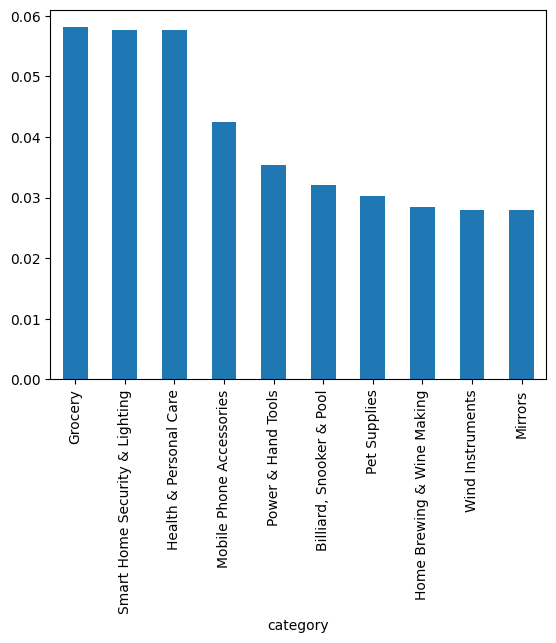

In [456]:
# Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
import matplotlib.pyplot as plt
sorted_crosstab.head(10).plot(kind="bar", stacked=True)
plt.show()

In [ ]:
Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above 
the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the 
dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [432]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
interquartile_price = Q3 - Q1
print(f'Interquartile Range: {interquartile_price}')

lower_bound = Q1 - 1.5 * interquartile_price
upper_bound = Q3 + 1.5 * interquartile_price

df_without_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df_without_outliers.shape 


Interquartile Range: 36.0


(2115963, 9)

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_22707/3483123228.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette='coolwarm')


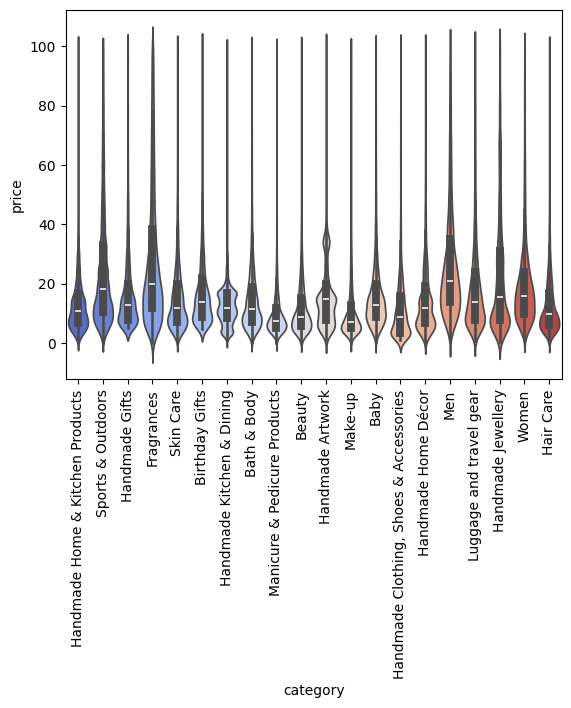

The product category which tends to have the highest median price is: Desktop PCs


In [446]:
# Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories. 
# Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.

import matplotlib.pyplot as plt

top_20_categories = df_without_outliers['category'].value_counts().head(20).index
df_top_20 = df_without_outliers[df_without_outliers['category'].isin(top_20_categories)]

sns.violinplot(data=df_top_20, x='category', y='price', palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_price_category = median_prices.idxmax()
print(f"The product category which tends to have the highest median price is: {highest_median_price_category}")

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_22707/3841666973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_prices.index, y=average_prices.values, palette='coolwarm')


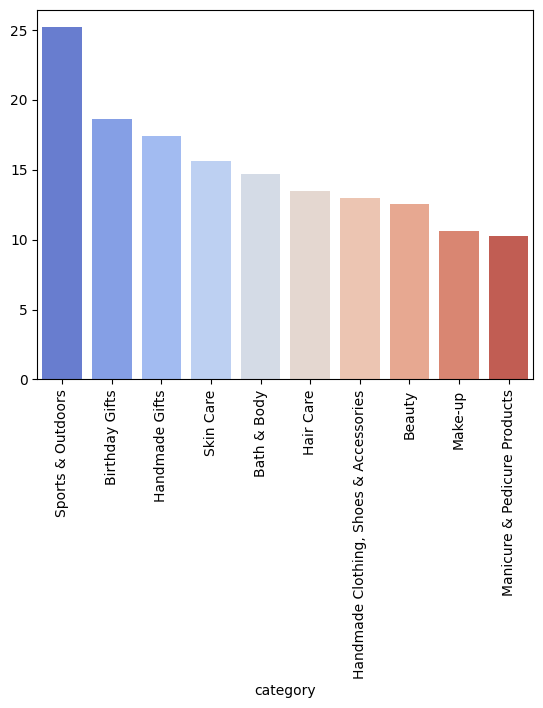

The category with the highest average price is: Sports & Outdoors


In [448]:
#Bar Charts:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

top_10_categories = df_without_outliers['category'].value_counts().nlargest(10).index
df_top_10 = df_without_outliers[df_without_outliers['category'].isin(top_10_categories)]

average_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

sns.barplot(x=average_prices.index, y=average_prices.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

# Find the category with the highest average price
highest_average_price_category = average_prices.idxmax()
print(f"The category with the highest average price is: {highest_average_price_category}")

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_22707/2331575232.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10_ratings, palette='coolwarm')


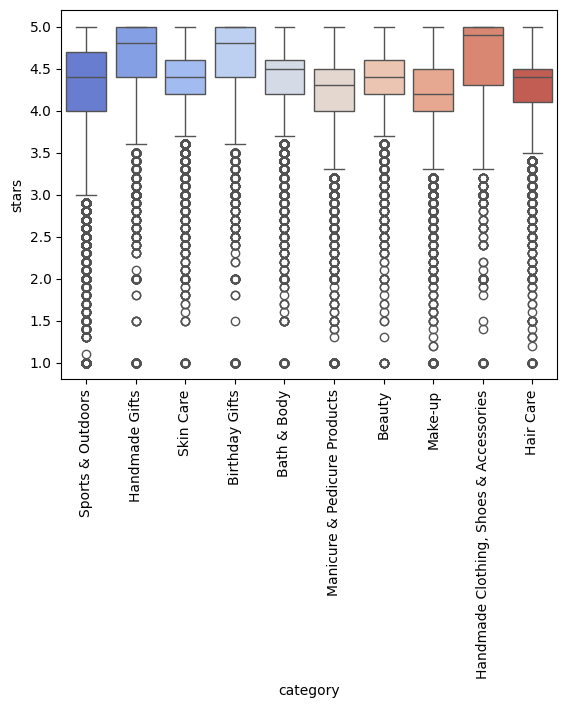

The category with the highest median rating is: Computer Memory


In [468]:
# Box Plots:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. 
# Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

import matplotlib.pyplot as plt

# Get the top 10 categories by count
top_10_categories_ratings = df_without_outliers['category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
df_top_10_ratings = df_without_outliers[df_without_outliers['category'].isin(top_10_categories_ratings)]
df_top_10_ratings = df_top_10_ratings[df_top_10_ratings['stars'] !=0]

# Plot the box plot for ratings
sns.boxplot(x='category', y='stars', data=df_top_10_ratings, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

# Find the category with the highest median rating
median_ratings = df_without_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median_rating_category = median_ratings.idxmax()
print(f"The category with the highest median rating is: {highest_median_rating_category}")



In [370]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.
# Correlation Coefficients:
# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?

correlation_coefficient = df_without_outliers['stars'].corr(df_without_outliers['price'])
correlation_coefficient

-0.07767299878181352

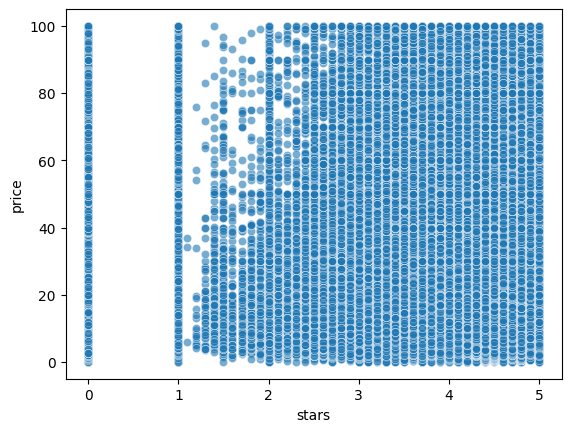

In [372]:
# Visualizations:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

sns.scatterplot(x='stars', y='price', data=df_without_outliers, alpha=0.6)
plt.show()

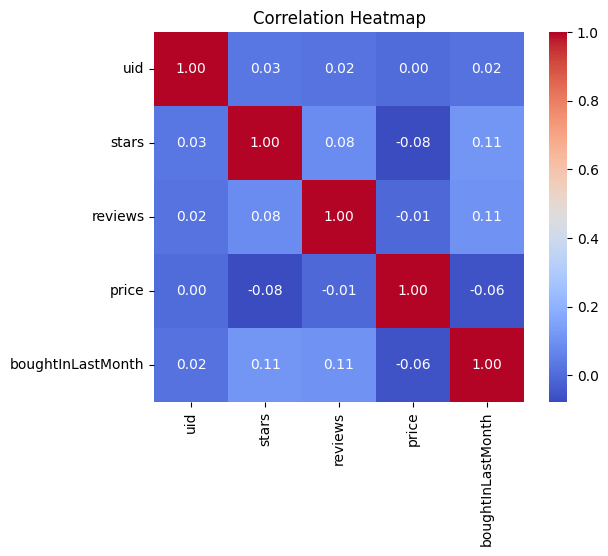

In [378]:
# Use a correlation heatmap to visualize correlations between all numerical variables.

numeric_df = df_without_outliers.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

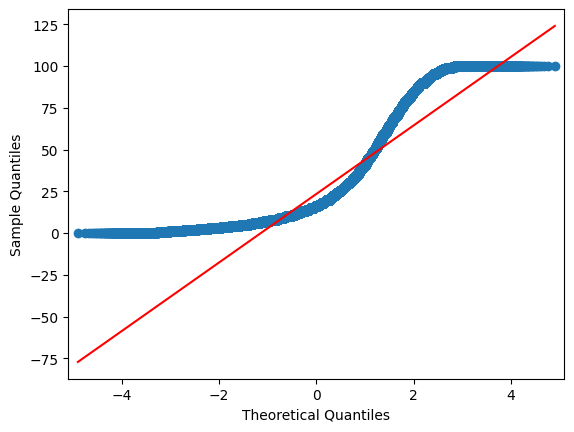

In [381]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
sm.qqplot(df_without_outliers['price'], line='s');
plt.show()